In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_resale = pd.read_csv("../data/cleaned/ResalePrice_amenities_coor.csv")
df_resale

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,...,lat,lon,nearest_mrt_distance,nearest_bus_distance,LatLng,education_score,shopping_score,food_score,recreation_score,healthcare_score
0,2017-03,BUKIT MERAH,3 ROOM,43,TELOK BLANGAH RISE,13 TO 15,59.0,Improved,1976,58 years 01 month,...,1.270380,103.823236,580.883827,100.652841,"1.270379512,103.823236",9.886121,31.231448,14.302518,29.626696,55.974066
1,2017-05,BUKIT MERAH,3 ROOM,43,TELOK BLANGAH RISE,07 TO 09,59.0,Improved,1976,57 years 11 months,...,1.270380,103.823236,580.883827,100.652841,"1.270379512,103.823236",9.886121,31.231448,14.302518,29.626696,55.974066
2,2018-01,BUKIT MERAH,3 ROOM,43,TELOK BLANGAH RISE,10 TO 12,59.0,Improved,1976,57 years 03 months,...,1.270380,103.823236,580.883827,100.652841,"1.270379512,103.823236",9.886121,31.231448,14.302518,29.626696,55.974066
3,2018-06,BUKIT MERAH,3 ROOM,43,TELOK BLANGAH RISE,01 TO 03,59.0,Improved,1976,56 years 11 months,...,1.270380,103.823236,580.883827,100.652841,"1.270379512,103.823236",9.886121,31.231448,14.302518,29.626696,55.974066
4,2018-06,BUKIT MERAH,3 ROOM,43,TELOK BLANGAH RISE,04 TO 06,59.0,Improved,1976,56 years 11 months,...,1.270380,103.823236,580.883827,100.652841,"1.270379512,103.823236",9.886121,31.231448,14.302518,29.626696,55.974066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201055,2024-07,SEMBAWANG,5 ROOM,484,ADMIRALTY LINK,07 TO 09,110.0,Improved,2003,78 years 01 month,...,1.457071,103.815308,1035.713889,117.518636,"1.457071216,103.8153084",19.199755,30.596328,1.233127,25.048367,8.851718
201056,2024-08,SEMBAWANG,4 ROOM,484,ADMIRALTY LINK,13 TO 15,91.0,Model A,2003,78 years,...,1.457071,103.815308,1035.713889,117.518636,"1.457071216,103.8153084",19.199755,30.596328,1.233127,25.048367,8.851718
201057,2024-10,SEMBAWANG,5 ROOM,484,ADMIRALTY LINK,13 TO 15,111.0,Improved,2003,77 years 10 months,...,1.457071,103.815308,1035.713889,117.518636,"1.457071216,103.8153084",19.199755,30.596328,1.233127,25.048367,8.851718
201058,2024-10,SEMBAWANG,5 ROOM,484,ADMIRALTY LINK,07 TO 09,110.0,Improved,2003,77 years 10 months,...,1.457071,103.815308,1035.713889,117.518636,"1.457071216,103.8153084",19.199755,30.596328,1.233127,25.048367,8.851718


/var/folders/pf/xn094ngs70lb3jh0xpvlzx8c0000gn/T/ipykernel_28382/2757938304.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


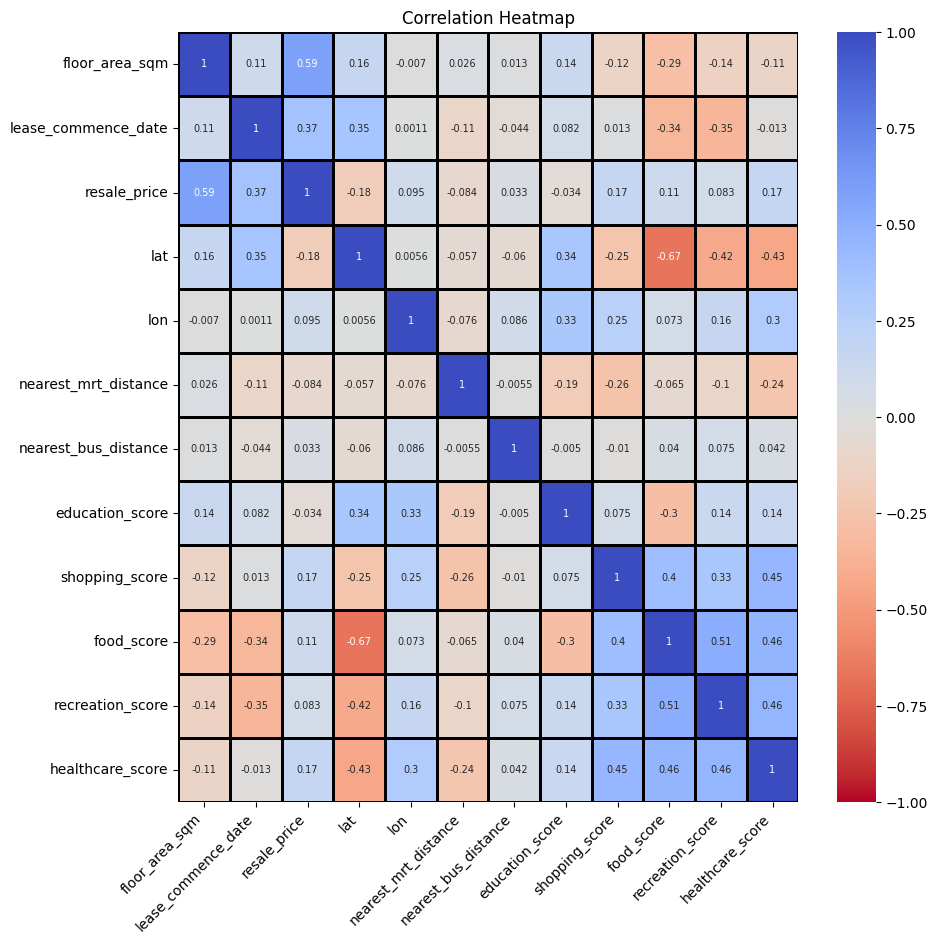

In [3]:
# Correlation heatmap
fig = plt.figure(figsize=(10,10))
ax = sns.heatmap(df_resale.select_dtypes(include=['int64','float64']).corr(), annot = True, fmt='.2g', 
    vmin=-1, vmax=1, center= 0, cmap= 'coolwarm_r', linecolor='black', linewidth=1, annot_kws={"size": 7})
plt.xticks(rotation=45, ha='right')
plt.title('Correlation Heatmap')
fig.show()

## Adjust resale price based on inflation rate

In [ ]:
df_CPI = pd.read_csv("../data/cleaned/SG_Inflation_Data.csv")

df_resale = df_resale.merge(df_CPI, left_on="month", right_on="Time", how="left")
df_resale.drop(columns=["Time"], inplace=True)
df_resale['resale_price'] = df_resale['resale_price']*100/df_resale['CPI (base 2024-12)']
df_resale


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,...,nearest_mrt_distance,nearest_bus_distance,LatLng,education_score,shopping_score,food_score,recreation_score,healthcare_score,CPI (base 2024-12),inflation_rate (x100)
0,2017-03,BUKIT MERAH,3 ROOM,43,TELOK BLANGAH RISE,13 TO 15,59.0,Improved,1976,58 years 01 month,...,580.883827,100.652841,"1.270379512,103.823236",9.886121,31.231448,14.302518,29.626696,55.974066,84.527761,0.041405
1,2017-05,BUKIT MERAH,3 ROOM,43,TELOK BLANGAH RISE,07 TO 09,59.0,Improved,1976,57 years 11 months,...,580.883827,100.652841,"1.270379512,103.823236",9.886121,31.231448,14.302518,29.626696,55.974066,84.556772,0.340212
2,2018-01,BUKIT MERAH,3 ROOM,43,TELOK BLANGAH RISE,10 TO 12,59.0,Improved,1976,57 years 03 months,...,580.883827,100.652841,"1.270379512,103.823236",9.886121,31.231448,14.302518,29.626696,55.974066,84.503016,-0.191484
3,2018-06,BUKIT MERAH,3 ROOM,43,TELOK BLANGAH RISE,01 TO 03,59.0,Improved,1976,56 years 11 months,...,580.883827,100.652841,"1.270379512,103.823236",9.886121,31.231448,14.302518,29.626696,55.974066,84.904050,0.056310
4,2018-06,BUKIT MERAH,3 ROOM,43,TELOK BLANGAH RISE,04 TO 06,59.0,Improved,1976,56 years 11 months,...,580.883827,100.652841,"1.270379512,103.823236",9.886121,31.231448,14.302518,29.626696,55.974066,84.904050,0.056310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201055,2024-07,SEMBAWANG,5 ROOM,484,ADMIRALTY LINK,07 TO 09,110.0,Improved,2003,78 years 01 month,...,1035.713889,117.518636,"1.457071216,103.8153084",19.199755,30.596328,1.233127,25.048367,8.851718,99.002534,-0.253604
201056,2024-08,SEMBAWANG,4 ROOM,484,ADMIRALTY LINK,13 TO 15,91.0,Model A,2003,78 years,...,1035.713889,117.518636,"1.457071216,103.8153084",19.199755,30.596328,1.233127,25.048367,8.851718,99.685999,0.690351
201057,2024-10,SEMBAWANG,5 ROOM,484,ADMIRALTY LINK,13 TO 15,111.0,Improved,2003,77 years 10 months,...,1035.713889,117.518636,"1.457071216,103.8153084",19.199755,30.596328,1.233127,25.048367,8.851718,99.623711,-0.313346
201058,2024-10,SEMBAWANG,5 ROOM,484,ADMIRALTY LINK,07 TO 09,110.0,Improved,2003,77 years 10 months,...,1035.713889,117.518636,"1.457071216,103.8153084",19.199755,30.596328,1.233127,25.048367,8.851718,99.623711,-0.313346


## Convert lease_commence_date into building age by 2025

In [ ]:
df_resale['building_age_2025'] = 2025 - df_resale['lease_commence_date']

## Convert to numeric 

In [ ]:
# Convert remaining_lease into numeric variables
def convert_to_years(age_str):
    parts = age_str.split()
    years = int(parts[0])
    months = 0
    if len(parts) > 2:
        months = int(parts[2])
    return round(years + (months / 12),2)

df_resale['remaining_lease'] = df_resale['remaining_lease'].apply(convert_to_years)

In [ ]:
flat_mapping = {
    '1 ROOM': 1,
    '2 ROOM': 2,
    '3 ROOM': 3,
    '4 ROOM': 4,
    '5 ROOM': 5,
    'MULTI-GENERATION': 6,
    'EXECUTIVE': 7
}

df_resale['flat_type'] = df_resale['flat_type'].map(flat_mapping)
df_resale['storey_range'] = df_resale['storey_range'].str[:2].astype(int)


In [ ]:
df_resale = df_resale.drop(columns=['address','street_name', 'block', 'LatLng', 'lease_commence_date'])

## Add Macro variables

### Unemployment Rate

In [ ]:
# Choose relevant rows
df_unemployment = pd.read_csv("../data/raw/unemployment.csv")
df_unemployment = df_unemployment.iloc[9:12]
df_unemployment.columns = df_unemployment.iloc[0]

# Pivot the columns
df_unemployment = df_unemployment[1:]
df_unemployment = df_unemployment.melt(id_vars=["Data Series"], var_name="year", value_name="unemployment_rate")
df_unemployment["year"] = df_unemployment["year"].astype(int)
df_unemployment = df_unemployment.pivot(index="year", columns="Data Series", values="unemployment_rate").reset_index()
df_unemployment.columns = ["year", "total_unemployment_rate", "resident_unemployment_rate"]

# Join with resale dataframe
df_resale["year"] = df_resale["month"].str[:4].astype(int)
df_resale = df_resale.merge(df_unemployment, on="year", how="left")
df_resale = df_resale.drop(columns=['year'])

### Interest rate

Choose Singapore Overnight Rate Average (SORA) as the indicator for interest rate/

In [ ]:
df_interest = pd.read_csv("../data/raw/interest_rate.csv",skiprows=10)
df_interest = df_interest[:8]
df_interest = df_interest.iloc[[6]]
df_interest

,Data Series,2025 Jan,2024 Dec,2024 Nov,2024 Oct,2024 Sep,2024 Aug,2024 Jul,2024 Jun,2024 May,...,1988 Oct,1988 Sep,1988 Aug,1988 Jul,1988 Jun,1988 May,1988 Apr,1988 Mar,1988 Feb,1988 Jan
6,Singapore Overnight Rate Average,2.6325,2.1123,3.0839,3.1559,3.8808,3.5355,3.4336,3.4325,3.5222,...,na,na,na,na,na,na,na,na,na,na


In [ ]:
df_interest.replace('na', np.nan, inplace=True)
df_interest = df_interest.dropna(axis=1)

df_interest = df_interest.melt(var_name="month", value_name="interest_rate")
df_interest = df_interest[1:]

/var/folders/pf/xn094ngs70lb3jh0xpvlzx8c0000gn/T/ipykernel_844/1638764280.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_interest.replace('na', np.nan, inplace=True)


In [ ]:
# Convert month to "YYYY-MM" date format
df_interest["month"] = df_interest["month"].str.strip()
df_interest["month"] = pd.to_datetime(df_interest["month"], format="%Y %b", errors="coerce")
df_interest = df_interest.dropna(subset=["month"])
df_interest["month"] = df_interest["month"].dt.strftime("%Y-%m")

# Join with resale dataframe
df_resale = df_resale.merge(df_interest, on="month", how="left")
df_resale

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,remaining_lease,resale_price,lat,lon,...,shopping_score,food_score,recreation_score,healthcare_score,CPI (base 2024-12),inflation_rate (x100),building_age_2025,total_unemployment_rate,resident_unemployment_rate,interest_rate
0,2017-03,BUKIT MERAH,3,13,59.0,Improved,58.08,343082.552693,1.270380,103.823236,...,31.231448,14.302518,29.626696,55.974066,84.527761,0.041405,49,3.1,2.2,0.5687
1,2017-05,BUKIT MERAH,3,7,59.0,Improved,57.92,342964.842883,1.270380,103.823236,...,31.231448,14.302518,29.626696,55.974066,84.556772,0.340212,49,3.1,2.2,0.4503
2,2018-01,BUKIT MERAH,3,10,59.0,Improved,57.25,325432.170445,1.270380,103.823236,...,31.231448,14.302518,29.626696,55.974066,84.503016,-0.191484,49,2.9,2.1,0.8294
3,2018-06,BUKIT MERAH,3,1,59.0,Improved,56.92,294450.027637,1.270380,103.823236,...,31.231448,14.302518,29.626696,55.974066,84.904050,0.056310,49,2.9,2.1,1.3426
4,2018-06,BUKIT MERAH,3,4,59.0,Improved,56.92,300339.028190,1.270380,103.823236,...,31.231448,14.302518,29.626696,55.974066,84.904050,0.056310,49,2.9,2.1,1.3426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201055,2024-07,SEMBAWANG,5,7,110.0,Improved,78.08,555541.334850,1.457071,103.815308,...,30.596328,1.233127,25.048367,8.851718,99.002534,-0.253604,22,2.7,2.0,3.4336
201056,2024-08,SEMBAWANG,4,13,91.0,Model A,78.00,501574.951425,1.457071,103.815308,...,30.596328,1.233127,25.048367,8.851718,99.685999,0.690351,22,2.7,2.0,3.5355
201057,2024-10,SEMBAWANG,5,13,111.0,Improved,77.83,630372.023708,1.457071,103.815308,...,30.596328,1.233127,25.048367,8.851718,99.623711,-0.313346,22,2.7,2.0,3.1559
201058,2024-10,SEMBAWANG,5,7,110.0,Improved,77.83,552077.409298,1.457071,103.815308,...,30.596328,1.233127,25.048367,8.851718,99.623711,-0.313346,22,2.7,2.0,3.1559


### Foreign Exchange Rate

In [ ]:
df_fxrate = pd.read_csv("../data/raw/fxrate.csv", skiprows=9).head(1)

df_fxrate.replace('na', np.nan, inplace=True)
df_fxrate = df_fxrate.dropna(axis=1)

df_fxrate = df_fxrate.melt(var_name="month", value_name="fx_rate")[1:]
df_fxrate

,month,fx_rate
1,2025 Jan,1.3625
2,2024 Dec,1.3503
3,2024 Nov,1.3365
4,2024 Oct,1.309
5,2024 Sep,1.2964
...,...,...
441,1988 May,2.0098
442,1988 Apr,2.0037
443,1988 Mar,2.0133
444,1988 Feb,2.0173


In [ ]:
# Convert month to "YYYY-MM" date format
df_fxrate["month"] = df_fxrate["month"].str.strip()
df_fxrate["month"] = pd.to_datetime(df_fxrate["month"], format="%Y %b", errors="coerce")
df_fxrate = df_fxrate.dropna(subset=["month"])
df_fxrate["month"] = df_fxrate["month"].dt.strftime("%Y-%m")

# Join with resale dataframe
df_resale = df_resale.merge(df_fxrate, on="month", how="left")
df_resale

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,remaining_lease,resale_price,lat,lon,...,food_score,recreation_score,healthcare_score,CPI (base 2024-12),inflation_rate (x100),building_age_2025,total_unemployment_rate,resident_unemployment_rate,interest_rate,fx_rate
0,2017-03,BUKIT MERAH,3,13,59.0,Improved,58.08,343082.552693,1.270380,103.823236,...,14.302518,29.626696,55.974066,84.527761,0.041405,49,3.1,2.2,0.5687,1.4057
1,2017-05,BUKIT MERAH,3,7,59.0,Improved,57.92,342964.842883,1.270380,103.823236,...,14.302518,29.626696,55.974066,84.556772,0.340212,49,3.1,2.2,0.4503,1.3946
2,2018-01,BUKIT MERAH,3,10,59.0,Improved,57.25,325432.170445,1.270380,103.823236,...,14.302518,29.626696,55.974066,84.503016,-0.191484,49,2.9,2.1,0.8294,1.322
3,2018-06,BUKIT MERAH,3,1,59.0,Improved,56.92,294450.027637,1.270380,103.823236,...,14.302518,29.626696,55.974066,84.904050,0.056310,49,2.9,2.1,1.3426,1.3474
4,2018-06,BUKIT MERAH,3,4,59.0,Improved,56.92,300339.028190,1.270380,103.823236,...,14.302518,29.626696,55.974066,84.904050,0.056310,49,2.9,2.1,1.3426,1.3474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201055,2024-07,SEMBAWANG,5,7,110.0,Improved,78.08,555541.334850,1.457071,103.815308,...,1.233127,25.048367,8.851718,99.002534,-0.253604,22,2.7,2.0,3.4336,1.3469
201056,2024-08,SEMBAWANG,4,13,91.0,Model A,78.00,501574.951425,1.457071,103.815308,...,1.233127,25.048367,8.851718,99.685999,0.690351,22,2.7,2.0,3.5355,1.3159
201057,2024-10,SEMBAWANG,5,13,111.0,Improved,77.83,630372.023708,1.457071,103.815308,...,1.233127,25.048367,8.851718,99.623711,-0.313346,22,2.7,2.0,3.1559,1.309
201058,2024-10,SEMBAWANG,5,7,110.0,Improved,77.83,552077.409298,1.457071,103.815308,...,1.233127,25.048367,8.851718,99.623711,-0.313346,22,2.7,2.0,3.1559,1.309


## Household Income

In [ ]:
income_2015 = pd.read_csv("../data/raw/Household_income_2015.csv")
income_2020 = pd.read_csv("../data/raw/Household_income_2020.csv")
income_2015.head()


,Thousands,Total,Below_1_000,1_000_1_499,1_500_1_999,2_000_2_499,2_500_2_999,3_000_3_999,4_000_4_999,5_000_5_999,6_000_6_999,7_000_7_999,8_000_8_999,9_000_9_999,10_000_10_999,11_000_11_999,12_000andOver
0,Total,2151.9,173.7,184.8,148.9,160.5,137.2,269.3,218.1,179.1,132.9,103.2,84.9,60.2,57.4,36.5,205.2
1,Ang Mo Kio,101.2,9.7,12.1,7.9,7.4,6.8,11.5,9.8,7.9,6.0,4.0,3.1,2.2,2.6,1.7,8.6
2,Bedok,150.3,12.2,13.6,12.1,9.7,9.6,17.2,13.4,12.2,9.2,5.4,5.1,4.0,4.5,2.7,19.4
3,Bishan,49.5,3.9,3.7,2.2,2.9,2.4,4.6,4.7,3.8,2.7,2.8,3.1,1.8,1.8,1.6,7.6
4,Bukit Batok,75.6,6.1,6.5,5.2,5.8,4.9,8.6,7.6,6.7,4.4,3.5,2.6,2.4,2.5,1.5,7.4


In [ ]:
income_2020.head()

,Number,Total,NoEmployedPerson,Below_1_000,1_000_1_999,2_000_2_999,3_000_3_999,4_000_4_999,5_000_5_999,6_000_6_999,...,8_000_8_999,9_000_9_999,10_000_10_999,11_000_11_999,12_000_12_999,13_000_13_999,14_000_14_999,15_000_17_499,17_500_19_999,20_000andOver
0,Total,1372559,182445,27007,70569,69341,74185,70712,73493,68660,...,62812,59781,55120,49210,43943,41042,35595,76886,55127,190514
1,Ang Mo Kio,60220,11455,1563,4228,3572,4020,3381,3134,2943,...,2210,2386,1947,1795,1363,1425,1156,2661,1841,6466
2,Bedok,97551,16818,2203,5278,5245,5521,4641,5102,3868,...,3455,3641,3291,2685,2620,2564,1838,4080,3349,17125
3,Bishan,29445,4412,508,983,910,1252,996,1225,1307,...,1060,1014,903,983,900,854,805,1801,1589,6864
4,Bukit Batok,54297,5983,847,3328,3031,3136,3200,3206,2713,...,2813,2359,2003,2187,1504,1640,1475,2963,2037,7142


We convert the first column to be the towns

In [ ]:
income_2015.rename(columns={'Thousands': 'town'}, inplace=True)
income_2020.rename(columns={'Number': 'town'}, inplace=True)
income_2015['town'] = income_2015['town'].str.upper()
income_2020['town'] = income_2015['town'].str.upper()

Note that there are some discrepancies between towns in resale data and household income data. To be specific,

- `TANGLIN, NOVENA, OTHERS` (in income data) are not in resale data. We will drop them.
- `CENTRAL AREA (in resale data)` is missing from income data (but we are mapping `OUTRAM` to it).
- `KALLANG/WHAMPOA` (in resale data) is missing from income data (but we are mapping `KALLANG` to it).


In [ ]:
print(f"Towns in household income data: {income_2015['town'].unique()}\n")
print(f"Towns in resale price data: {df_resale['town'].unique()}")

Towns in household income data: ['TOTAL' 'ANG MO KIO' 'BEDOK' 'BISHAN' 'BUKIT BATOK' 'BUKIT MERAH'
 'BUKIT PANJANG' 'BUKIT TIMAH' 'CHOA CHU KANG' 'CLEMENTI' 'GEYLANG'
 'HOUGANG' 'JURONG EAST' 'JURONG WEST' 'KALLANG' 'MARINE PARADE' 'NOVENA'
 'OUTRAM' 'PASIR RIS' 'PUNGGOL' 'QUEENSTOWN' 'SEMBAWANG' 'SENGKANG'
 'SERANGOON' 'TAMPINES' 'TANGLIN' 'TOA PAYOH' 'WOODLANDS' 'YISHUN'
 'OTHERS']

Towns in resale price data: ['BUKIT MERAH' 'CENTRAL AREA' 'KALLANG/WHAMPOA' 'QUEENSTOWN'
 'MARINE PARADE' 'CLEMENTI' 'GEYLANG' 'BUKIT TIMAH' 'JURONG EAST' 'BEDOK'
 'JURONG WEST' 'TOA PAYOH' 'TAMPINES' 'BUKIT BATOK' 'BISHAN' 'SERANGOON'
 'HOUGANG' 'ANG MO KIO' 'PASIR RIS' 'BUKIT PANJANG' 'CHOA CHU KANG'
 'SENGKANG' 'PUNGGOL' 'YISHUN' 'WOODLANDS' 'SEMBAWANG']


In [ ]:
import pandas as pd

region_mapping = {
    'KALLANG': 'KALLANG/WHAMPOA',
    'OUTRAM': 'CENTRAL AREA'
}

income_2015['town'] = income_2015['town'].replace(region_mapping)
income_2020['town'] = income_2020['town'].replace(region_mapping)


resale_regions = list(df_resale['town'].unique())
income_2015 = income_2015[income_2015['town'].isin(resale_regions)]
income_2020 = income_2020[income_2020['town'].isin(resale_regions)]
print(income_2020)


               town  Total  NoEmployedPerson  Below_1_000  1_000_1_999  \
1        ANG MO KIO  60220             11455         1563         4228   
2             BEDOK  97551             16818         2203         5278   
3            BISHAN  29445              4412          508          983   
4       BUKIT BATOK  54297              5983          847         3328   
5       BUKIT MERAH  59700             12444         1899         4583   
6     BUKIT PANJANG  43580              4389          665         1665   
7       BUKIT TIMAH  24612              3846          294          364   
8     CHOA CHU KANG  58024              4463          904         2054   
9          CLEMENTI  33609              5990          804         1656   
10          GEYLANG   1547               175           21           22   
11          HOUGANG  42060              6991         1030         2826   
12      JURONG EAST  75109              8503         1475         4008   
13      JURONG WEST  27213            

In [ ]:
midpoints = {
    'Below_1_000': 500,
    '1_000_1_499': 1250,
    '1_500_1_999': 1750,
    '2_000_2_499': 2250,
    '2_500_2_999': 2750,
    '3_000_3_999': 3500,
    '4_000_4_999': 4500,
    '5_000_5_999': 5500,
    '6_000_6_999': 6500,
    '7_000_7_999': 7500,
    '8_000_8_999': 8500,
    '9_000_9_999': 9500,
    '10_000_10_999': 10500,
    '11_000_11_999': 11500,
    '12_000andOver': 13000 
}

def estimate_average_income(row):
    total_pop = row['Total'] 
    sum = 0
    for bracket, midpoint in midpoints.items():
        bracket_pop = row.get(bracket, 0)
        sum += bracket_pop * midpoint
    return sum / total_pop

In [ ]:
income_2015['household_income_2015'] = income_2015.apply(estimate_average_income, axis=1)
income_2020['household_income_2020'] = income_2020.apply(estimate_average_income, axis=1)

income_2015 = income_2015[['town', 'household_income_2015']]
income_2020 = income_2020[['town', 'household_income_2020']]
df_household_income = income_2015.merge(income_2020, on='town', how='left')
df_household_income = df_household_income.melt(
    id_vars=['town'], 
    value_vars=['household_income_2015', 'household_income_2020'],
    var_name='year',
    value_name='avg_household_income'
)

df_household_income['year'] = df_household_income['year'].map({
    'household_income_2015': 2015,
    'household_income_2020': 2020
})
df_household_income.head()


,town,year,avg_household_income
0,ANG MO KIO,2015,4662.549407
1,BEDOK,2015,5271.124418
2,BISHAN,2015,6056.565657
3,BUKIT BATOK,2015,5124.338624
4,BUKIT MERAH,2015,4834.854015


Join `df_household_income` with `df_resale` using town and year. We can map

- 2015-2019 in resale price → 2015 in household income
- 2020 and beyond in resale price → 2020 in household income

In [ ]:
# Join with resale data by town and year
import pandas as pd

# Extract year from 'month' column in resale_price
df_resale['income_year'] = df_resale['month'].str[:4].astype(int).apply(lambda x: 2015 if x <= 2019 else 2020)


df_resale = df_resale.merge(
    df_household_income, 
    left_on=['town', 'income_year'], 
    right_on=['town', 'year'], 
    how='left'
).drop(columns=['income_year','year'])


df_resale


,month,town,flat_type,storey_range,floor_area_sqm,flat_model,remaining_lease,resale_price,lat,lon,...,recreation_score,healthcare_score,CPI (base 2024-12),inflation_rate (x100),building_age_2025,total_unemployment_rate,resident_unemployment_rate,interest_rate,fx_rate,avg_household_income
0,2017-03,BUKIT MERAH,3,13,59.0,Improved,58.08,343082.552693,1.270380,103.823236,...,29.626696,55.974066,84.527761,0.041405,49,3.1,2.2,0.5687,1.4057,4834.854015
1,2017-05,BUKIT MERAH,3,7,59.0,Improved,57.92,342964.842883,1.270380,103.823236,...,29.626696,55.974066,84.556772,0.340212,49,3.1,2.2,0.4503,1.3946,4834.854015
2,2018-01,BUKIT MERAH,3,10,59.0,Improved,57.25,325432.170445,1.270380,103.823236,...,29.626696,55.974066,84.503016,-0.191484,49,2.9,2.1,0.8294,1.322,4834.854015
3,2018-06,BUKIT MERAH,3,1,59.0,Improved,56.92,294450.027637,1.270380,103.823236,...,29.626696,55.974066,84.904050,0.056310,49,2.9,2.1,1.3426,1.3474,4834.854015
4,2018-06,BUKIT MERAH,3,4,59.0,Improved,56.92,300339.028190,1.270380,103.823236,...,29.626696,55.974066,84.904050,0.056310,49,2.9,2.1,1.3426,1.3474,4834.854015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201055,2024-07,SEMBAWANG,5,7,110.0,Improved,78.08,555541.334850,1.457071,103.815308,...,25.048367,8.851718,99.002534,-0.253604,22,2.7,2.0,3.4336,1.3469,2348.203924
201056,2024-08,SEMBAWANG,4,13,91.0,Model A,78.00,501574.951425,1.457071,103.815308,...,25.048367,8.851718,99.685999,0.690351,22,2.7,2.0,3.5355,1.3159,2348.203924
201057,2024-10,SEMBAWANG,5,13,111.0,Improved,77.83,630372.023708,1.457071,103.815308,...,25.048367,8.851718,99.623711,-0.313346,22,2.7,2.0,3.1559,1.309,2348.203924
201058,2024-10,SEMBAWANG,5,7,110.0,Improved,77.83,552077.409298,1.457071,103.815308,...,25.048367,8.851718,99.623711,-0.313346,22,2.7,2.0,3.1559,1.309,2348.203924


## Deflate resale price using price index

In [ ]:
df_index = pd.read_csv("../data/raw/HDB_price_index.csv")

quarter_to_months = {
    'Q1': ['01', '02', '03'],
    'Q2': ['04', '05', '06'],
    'Q3': ['07', '08', '09'],
    'Q4': ['10', '11', '12'],
}

rows = []
for _, row in df_index.iterrows():
    year, quarter = row['quarter'].split('-')
    months = quarter_to_months[quarter]
    for m in months:
        rows.append({'month': f'{year}-{m}', 'price_index': row['index']})

df_index_monthly = pd.DataFrame(rows)

df_deflated = df_resale.merge(df_index_monthly, on='month', how='left')
df_deflated


,quarter,index
0,1990-Q1,24.3
1,1990-Q2,24.4
2,1990-Q3,25.0
3,1990-Q4,24.7
4,1991-Q1,24.9
...,...,...
135,2023-Q4,180.4
136,2024-Q1,183.7
137,2024-Q2,187.9
138,2024-Q3,192.9


## Normalise continuous variables

In [ ]:
df_resale_normalized = df_resale.copy()
def normalize(col):
    return (col - col.min()) / (col.max() - col.min()) if col.max() != col.min() else col

columns_to_normalize = df_resale_normalized.select_dtypes(include=['float', 'int']).columns.tolist()

df_resale_normalized[columns_to_normalize] = df_resale[columns_to_normalize].apply(normalize)
df_resale_normalized

df_resale['month'] = pd.to_datetime(df_resale['month'])
df_resale['year'] = df_resale['month'].dt.year
df_resale['month'] = df_resale['month'].dt.year


,month,town,flat_type,storey_range,floor_area_sqm,flat_model,remaining_lease,resale_price,lat,lon,...,recreation_score,healthcare_score,CPI (base 2024-12),inflation_rate (x100),building_age_2025,total_unemployment_rate,resident_unemployment_rate,interest_rate,fx_rate,avg_household_income
0,2017-03,BUKIT MERAH,0.333333,0.2500,0.083408,Improved,0.312121,0.131278,0.0,0.456109,...,0.112261,0.169271,0.018299,0.444476,0.818182,3.1,2.2,0.5687,1.4057,0.504874
1,2017-05,BUKIT MERAH,0.333333,0.1250,0.083408,Improved,0.309346,0.131197,0.0,0.456109,...,0.112261,0.169271,0.020140,0.582388,0.818182,3.1,2.2,0.4503,1.3946,0.504874
2,2018-01,BUKIT MERAH,0.333333,0.1875,0.083408,Improved,0.297728,0.119126,0.0,0.456109,...,0.112261,0.169271,0.016729,0.336988,0.818182,2.9,2.1,0.8294,1.322,0.504874
3,2018-06,BUKIT MERAH,0.333333,0.0000,0.083408,Improved,0.292006,0.097795,0.0,0.456109,...,0.112261,0.169271,0.042174,0.451355,0.818182,2.9,2.1,1.3426,1.3474,0.504874
4,2018-06,BUKIT MERAH,0.333333,0.0625,0.083408,Improved,0.292006,0.101849,0.0,0.456109,...,0.112261,0.169271,0.042174,0.451355,0.818182,2.9,2.1,1.3426,1.3474,0.504874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201055,2024-07,SEMBAWANG,0.666667,0.1250,0.235329,Improved,0.658921,0.277557,1.0,0.429908,...,0.083381,0.026768,0.936712,0.308317,0.327273,2.7,2.0,3.4336,1.3469,0.151737
201056,2024-08,SEMBAWANG,0.500000,0.2500,0.178731,Model A,0.657534,0.240401,1.0,0.429908,...,0.083381,0.026768,0.980077,0.743992,0.327273,2.7,2.0,3.5355,1.3159,0.151737
201057,2024-10,SEMBAWANG,0.666667,0.2500,0.238308,Improved,0.654586,0.329079,1.0,0.429908,...,0.083381,0.026768,0.976125,0.280743,0.327273,2.7,2.0,3.1559,1.309,0.151737
201058,2024-10,SEMBAWANG,0.666667,0.1250,0.235329,Improved,0.654586,0.275172,1.0,0.429908,...,0.083381,0.026768,0.976125,0.280743,0.327273,2.7,2.0,3.1559,1.309,0.151737


In [ ]:
df_resale.to_csv('../data/cleaned/resale_price_cleaned.csv', index=False)
df_resale_normalized.to_csv('../data/cleaned/resale_price_normalized.csv', index=False)